In [1]:
import sys, os
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.append(os.path.abspath(os.path.join('..','data_processing')))
sys.path.append(os.path.abspath(os.path.join('..','models')))

# Single Task evaluation

In [ ]:
from preprocessing import test_data

In [4]:
def evaluate_face_classification_model(model_path, test_dataset, threshold=0.5):
    # Load the model
    model = tf.keras.models.load_model(model_path)
    print(f"Model loaded from {model_path}")

    # Prepare test dataset for predictions
    all_images = []
    all_labels = []

    for images, labels in test_dataset.unbatch():
        all_images.append(images.numpy())
        all_labels.append(labels.numpy())

    # Convert to numpy arrays
    all_images = np.array(all_images)
    all_labels = np.array(all_labels)

    # Predict on the entire test dataset
    y_pred_probabilities = model.predict(all_images, verbose=1)

    # Adjust the decision threshold
    y_pred = (y_pred_probabilities.flatten() >= threshold).astype(int)
    y_true = all_labels.astype(int)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_true, y_pred)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

    # Generate classification report
    class_labels = ['Non-Face', 'Face']
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels, zero_division=0))

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

    print("\nConfusion Matrix (Percentages):")
    print(conf_matrix_percentage)

    # Plot confusion matrix in percentages
    def plot_confusion_matrix_percentage(cm, class_names):
        plt.figure(figsize=(6, 6))
        plt.imshow(cm, interpolation='nearest', cmap='Blues')
        plt.title("Confusion Matrix (Percentages)")
        plt.colorbar()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=45)
        plt.yticks(tick_marks, class_names)

        # Add labels to each cell
        threshold = cm.max() / 2
        for i, j in np.ndindex(cm.shape):
            plt.text(j, i, f"{cm[i, j]:.2f}%",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black")

        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()

    plot_confusion_matrix_percentage(conf_matrix_percentage, class_labels)
    plt.show()

    # Precision, Recall, and F1 Score
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred)

    print(f"\nPrecision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")


Model loaded from ../results/Single Task/MobileNet/MobileNet.h5
47/47 [==============================] - 3s 49ms/step
Test Accuracy: 99.53%

Classification Report:
              precision    recall  f1-score   support

    Non-Face       0.99      1.00      1.00       750
        Face       1.00      0.99      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


Confusion Matrix (Percentages):
[[99.86666667  0.13333333]
 [ 0.8        99.2       ]]


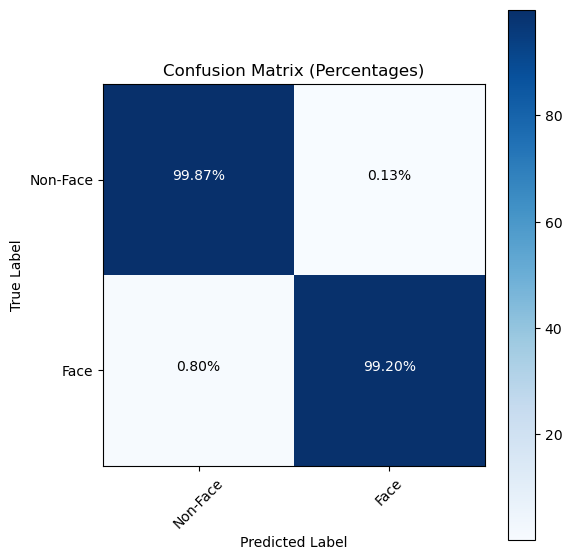


Precision: 1.00
Recall: 0.99
F1 Score: 1.00


In [9]:
evaluate_face_classification_model('../results/Single Task/resNet50/resNet50.h5',test_data)

Model loaded from ../results/Single Task/inception/inception.h5
47/47 [==============================] - 11s 137ms/step
Test Accuracy: 99.87%

Classification Report:
              precision    recall  f1-score   support

    Non-Face       1.00      1.00      1.00       750
        Face       1.00      1.00      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


Confusion Matrix (Percentages):
[[100.           0.        ]
 [  0.26666667  99.73333333]]


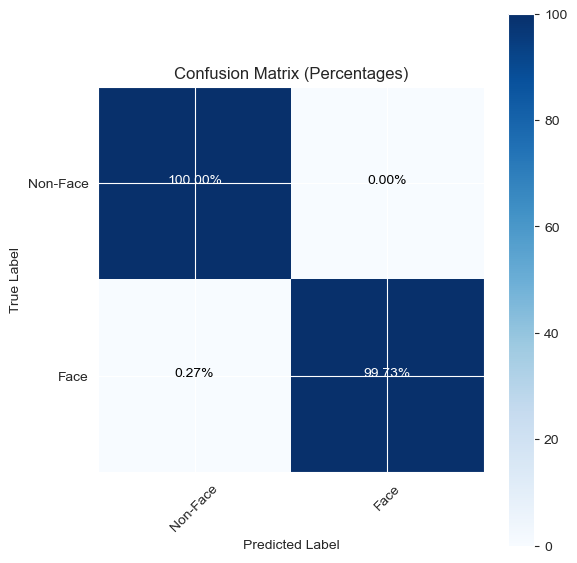


Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [5]:
evaluate_face_classification_model('../results/Single Task/inception/inception.h5',test_data)

Model loaded from ../results/Single Task/resNet50/resNet50.h5
47/47 [==============================] - 8s 103ms/step
Test Accuracy: 99.87%

Classification Report:
              precision    recall  f1-score   support

    Non-Face       1.00      1.00      1.00       750
        Face       1.00      1.00      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


Confusion Matrix (Percentages):
[[100.           0.        ]
 [  0.26666667  99.73333333]]


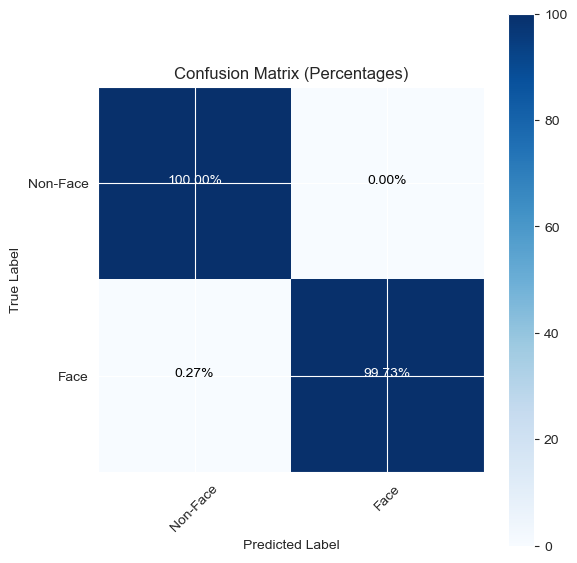


Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [5]:
evaluate_face_classification_model('../results/Single Task/resNet50/resNet50.h5',test_data)

Model loaded from ../results/Single Task/EfficientNetB0/EfficientNetB0.h5
47/47 [==============================] - 7s 60ms/step
Test Accuracy: 99.67%

Classification Report:
              precision    recall  f1-score   support

    Non-Face       0.99      1.00      1.00       750
        Face       1.00      0.99      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


Confusion Matrix (Percentages):
[[100.           0.        ]
 [  0.66666667  99.33333333]]


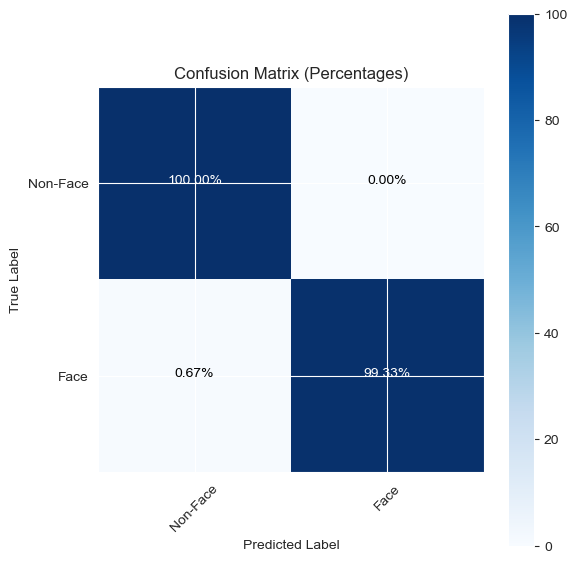


Precision: 1.00
Recall: 0.99
F1 Score: 1.00


In [5]:
evaluate_face_classification_model('../results/Single Task/EfficientNetB0/EfficientNetB0.h5',test_data)

Model loaded from ../results/Single Task/EfficientNetB3/EfficientNetB3.h5
47/47 [==============================] - 11s 106ms/step
Test Accuracy: 99.80%

Classification Report:
              precision    recall  f1-score   support

    Non-Face       1.00      1.00      1.00       750
        Face       1.00      1.00      1.00       750

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


Confusion Matrix (Percentages):
[[99.86666667  0.13333333]
 [ 0.26666667 99.73333333]]


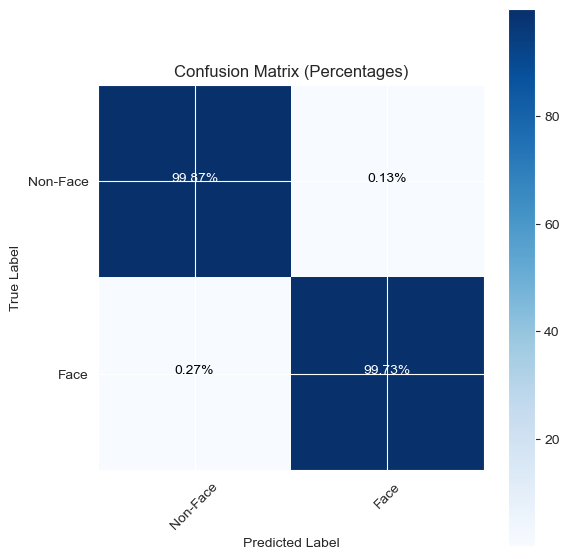


Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [6]:
evaluate_face_classification_model('../results/Single Task/EfficientNetB3/EfficientNetB3.h5',test_data)


# Multi Task evaluation

In [3]:
from multitask_preprocessing import  test_dataset

resnet50

Loading and cleaning train data from ../../data/MultiTaskBalanced\train.csv...

Initial DataFrame for train.csv:
            name                                         image_path  \
0            NaN  ../../data/MultiTaskBalanced\train\gsun_12d85d...   
1  Quinton Aaron  ../../data/MultiTaskBalanced\train\nm2466842_r...   
2   David Henrie  ../../data/MultiTaskBalanced\train\nm1273708_r...   
3            NaN  ../../data/MultiTaskBalanced\train\gsun_da476d...   
4     Eva Mendes  ../../data/MultiTaskBalanced\train\nm0578949_r...   

   face_label  age_label  gender_label  
0         0.0       -1.0          -1.0  
1         1.0       26.0           1.0  
2         1.0       18.0           1.0  
3         0.0       -1.0          -1.0  
4         1.0       31.0           0.0  
Dropped 0 rows due to missing labels.
After removing non-existent images, 21976 rows remain.
Removed 0 rows due to invalid age groups.
Final DataFrame for train.csv after cleaning:
            name       

In [4]:
def evaluate_model(model_path, test_dataset, age_group_map):
    # Load the model
    model = tf.keras.models.load_model(model_path)
    print(f"Model loaded from {model_path}")

    # Create a reverse mapping from index to age group label
    reverse_age_group_map = {v: k for k, v in age_group_map.items()}
    print(f"Reverse Age Group Map: {reverse_age_group_map}")

    # Initialize lists to store true labels and predictions
    y_true_face = []
    y_pred_face = []

    y_true_age = []
    y_pred_age = []

    y_true_gender = []
    y_pred_gender = []

    # Iterate over the test dataset
    for batch_idx, batch in enumerate(test_dataset):
        images, labels, sample_weights = batch

        # Get true labels
        y_true_face_batch = labels['face_output'].numpy()
        y_true_age_batch = labels['age_output'].numpy()
        y_true_gender_batch = labels['gender_output'].numpy()

        # Get predictions
        predictions = model.predict(images, verbose=0)

        # Handle different output structures
        if isinstance(predictions, (list, tuple)):
            if len(predictions) != 3:
                raise ValueError(f"Expected 3 outputs from the model, got {len(predictions)}.")
            y_pred_face_batch, y_pred_age_batch, y_pred_gender_batch = predictions
        elif isinstance(predictions, dict):
            y_pred_face_batch = predictions['face_output']
            y_pred_age_batch = predictions['age_output']
            y_pred_gender_batch = predictions['gender_output']
        else:
            raise TypeError("Model predictions should be a list, tuple, or dict.")

        # Append to lists
        y_true_face.extend(y_true_face_batch.flatten())
        y_pred_face.extend(y_pred_face_batch.flatten())

        y_true_age.extend(y_true_age_batch)
        y_pred_age.extend(y_pred_age_batch)

        y_true_gender.extend(y_true_gender_batch.flatten())
        y_pred_gender.extend(y_pred_gender_batch.flatten())

        if (batch_idx + 1) % 100 == 0:
            print(f"Processed {batch_idx + 1} batches.")

    # Convert lists to arrays
    y_true_face = np.array(y_true_face)
    y_pred_face = np.array(y_pred_face)

    y_true_age = np.array(y_true_age)
    y_pred_age = np.array(y_pred_age)

    y_true_gender = np.array(y_true_gender)
    y_pred_gender = np.array(y_pred_gender)

    # Convert predictions to class labels
    # Face detection (binary classification)
    y_pred_face_classes = (y_pred_face >= 0.5).astype(int)
    y_true_face_classes = y_true_face.astype(int)

    # Mask to select only face images for age and gender tasks
    face_mask = y_true_face_classes == 1

    # Age group classification (multi-class classification)
    y_true_age_classes = np.argmax(y_true_age, axis=1)
    y_pred_age_classes = np.argmax(y_pred_age, axis=1)

    # Apply face mask
    y_true_age_classes = y_true_age_classes[face_mask]
    y_pred_age_classes = y_pred_age_classes[face_mask]

    # Gender classification (binary classification)
    y_pred_gender_classes = (y_pred_gender >= 0.5).astype(int)
    y_true_gender_classes = y_true_gender[face_mask].astype(int)
    y_pred_gender_classes = y_pred_gender_classes[face_mask]

    # Face Detection Evaluation

    print("\n=== Face Detection ===")
    print("Classification Report:")
    print(classification_report(
        y_true_face_classes,
        y_pred_face_classes,
        target_names=['Non-Face', 'Face'],
        zero_division=0
    ))

    # Confusion Matrix with Percentages
    cf_matrix_face = confusion_matrix(y_true_face_classes, y_pred_face_classes)
    cf_matrix_face_perc = cf_matrix_face / cf_matrix_face.sum(axis=1, keepdims=True) * 100

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cf_matrix_face_perc,
        annot=True,
        fmt='.2f',
        cmap='Blues',
        xticklabels=['Non-Face', 'Face'],
        yticklabels=['Non-Face', 'Face']
    )
    plt.title('Face Detection Confusion Matrix (%)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Age Group Classification Evaluation
    print("\n=== Age Group Classification ===")

    # Check unique classes to avoid index errors
    unique_classes = np.unique(y_true_age_classes)
    print(f"Unique classes in y_true_age_classes: {unique_classes}")

    # Ensure that unique_classes are valid indices
    if np.any(unique_classes >= len(reverse_age_group_map)) or np.any(unique_classes < 0):
        raise ValueError("Unique classes in y_true_age_classes contain invalid indices.")

    # Map unique classes to their corresponding age group names
    age_group_names_present = [reverse_age_group_map[i] for i in unique_classes]
    print(f"Age group names present: {age_group_names_present}")

    print("Classification Report:")
    print(classification_report(
        y_true_age_classes,
        y_pred_age_classes,
        labels=unique_classes,
        target_names=age_group_names_present,
        zero_division=0
    ))

    # Confusion Matrix with Percentages
    cf_matrix_age = confusion_matrix(
        y_true_age_classes,
        y_pred_age_classes,
        labels=unique_classes
    )
    cf_matrix_age_perc = cf_matrix_age / cf_matrix_age.sum(axis=1, keepdims=True) * 100

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cf_matrix_age_perc,
        annot=True,
        fmt='.2f',
        cmap='Blues',
        xticklabels=age_group_names_present,
        yticklabels=age_group_names_present
    )
    plt.title('Age Group Confusion Matrix (%)')
    plt.xlabel('Predicted Age Group')
    plt.ylabel('True Age Group')
    plt.show()

    # Gender Classification Evaluation

    print("\n=== Gender Classification ===")
    gender_names = ['Male', 'Female']

    print("Classification Report:")
    print(classification_report(
        y_true_gender_classes,
        y_pred_gender_classes,
        target_names=gender_names,
        zero_division=0
    ))

    # Confusion Matrix with Percentages
    cf_matrix_gender = confusion_matrix(y_true_gender_classes, y_pred_gender_classes)
    cf_matrix_gender_perc = cf_matrix_gender / cf_matrix_gender.sum(axis=1, keepdims=True) * 100

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cf_matrix_gender_perc,
        annot=True,
        fmt='.2f',
        cmap='Blues',
        xticklabels=gender_names,
        yticklabels=gender_names
    )
    plt.title('Gender Classification Confusion Matrix (%)')
    plt.xlabel('Predicted Gender')
    plt.ylabel('True Gender')
    plt.show()


In [5]:
# Define label mappings as used during training
age_group_map = {
    '18-29': 0,
    '30-39': 1,
    '40-49': 2,
    '50-59': 3,
    'more than 60': 4
}

gender_map = {
    0: 'female',
    1: 'male'
}


In [7]:
model_path = '../results/Multi_Task/Resnet_MultiTask/Resnet_MultiTask.h5'

In [ ]:
evaluate_model(
    model_path,
    test_dataset,
    age_group_map
)


## EfficientNetB0_MultiTask

Model loaded from ../results/Multi_Task/EfficientNetB0_MultiTask/EfficientNetB0_MultiTask.h5
Reverse Age Group Map: {0: '18-29', 1: '30-39', 2: '40-49', 3: '50-59', 4: 'more than 60'}

=== Face Detection ===
Classification Report:
              precision    recall  f1-score   support

    Non-Face       1.00      1.00      1.00      1203
        Face       1.00      1.00      1.00      1544

    accuracy                           1.00      2747
   macro avg       1.00      1.00      1.00      2747
weighted avg       1.00      1.00      1.00      2747



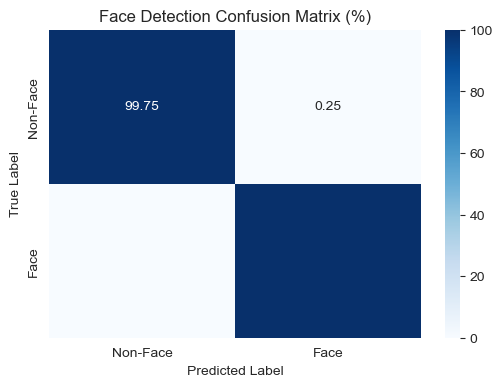


=== Age Group Classification ===
Unique classes in y_true_age_classes: [0 1 2 3 4]
Age group names present: ['18-29', '30-39', '40-49', '50-59', 'more than 60']
Classification Report:
              precision    recall  f1-score   support

       18-29       0.39      0.54      0.46       346
       30-39       0.32      0.28      0.30       333
       40-49       0.36      0.32      0.34       341
       50-59       0.32      0.23      0.27       277
more than 60       0.66      0.74      0.70       247

    accuracy                           0.41      1544
   macro avg       0.41      0.42      0.41      1544
weighted avg       0.40      0.41      0.40      1544



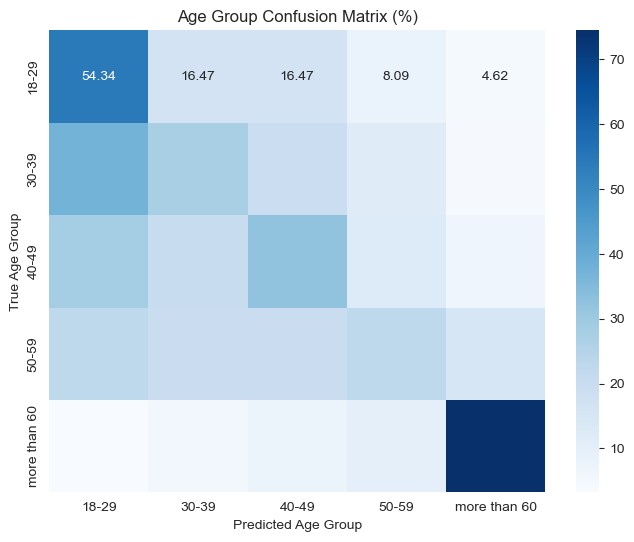


=== Gender Classification ===
Classification Report:
              precision    recall  f1-score   support

        Male       0.78      0.67      0.72       744
      Female       0.73      0.83      0.77       800

    accuracy                           0.75      1544
   macro avg       0.75      0.75      0.75      1544
weighted avg       0.75      0.75      0.75      1544



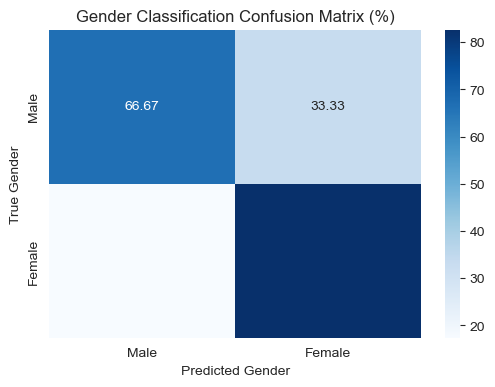

In [7]:
evaluate_model(model_path,test_dataset,age_group_map)

## EfficientNetB0_MultiTask v2

Model loaded from ../results/Multi_Task/EfficientNetB0_MultiTask_v2/EfficientNetB0_MultiTask_v2.h5
Reverse Age Group Map: {0: '18-29', 1: '30-39', 2: '40-49', 3: '50-59', 4: 'more than 60'}

=== Face Detection ===
Classification Report:
              precision    recall  f1-score   support

    Non-Face       1.00      1.00      1.00      1203
        Face       1.00      1.00      1.00      1544

    accuracy                           1.00      2747
   macro avg       1.00      1.00      1.00      2747
weighted avg       1.00      1.00      1.00      2747



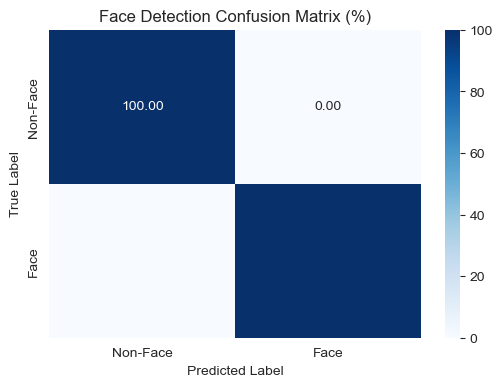


=== Age Group Classification ===
Unique classes in y_true_age_classes: [0 1 2 3 4]
Age group names present: ['18-29', '30-39', '40-49', '50-59', 'more than 60']
Classification Report:
              precision    recall  f1-score   support

       18-29       0.64      0.71      0.67       346
       30-39       0.51      0.50      0.51       333
       40-49       0.56      0.55      0.56       341
       50-59       0.64      0.58      0.61       277
more than 60       0.94      0.91      0.93       247

    accuracy                           0.64      1544
   macro avg       0.66      0.65      0.66      1544
weighted avg       0.64      0.64      0.64      1544



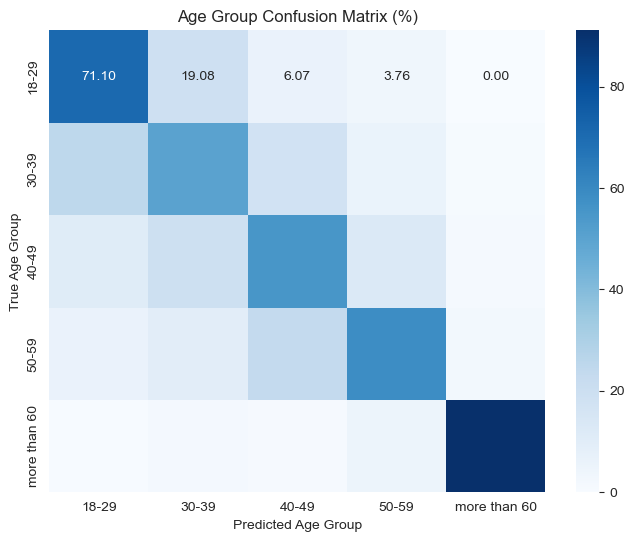


=== Gender Classification ===
Classification Report:
              precision    recall  f1-score   support

        Male       0.84      0.82      0.83       744
      Female       0.84      0.85      0.84       800

    accuracy                           0.84      1544
   macro avg       0.84      0.84      0.84      1544
weighted avg       0.84      0.84      0.84      1544



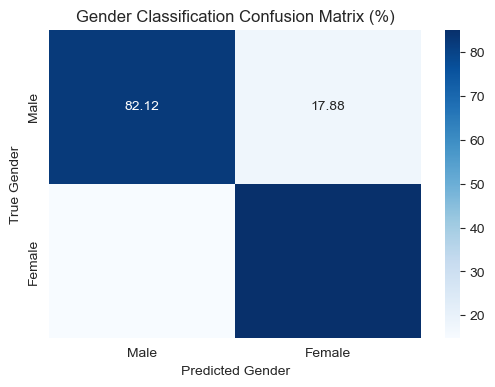

In [9]:
evaluate_model(
    model_path,
    test_dataset,
    age_group_map
)


## EfficientNetB3_MultiTask 

Model loaded from ../results/Multi_Task/EfficientNetB3_MultiTask/EfficientNetB3_MultiTask.h5
Reverse Age Group Map: {0: '18-29', 1: '30-39', 2: '40-49', 3: '50-59', 4: 'more than 60'}

=== Face Detection ===
Classification Report:
              precision    recall  f1-score   support

    Non-Face       1.00      1.00      1.00      1203
        Face       1.00      1.00      1.00      1544

    accuracy                           1.00      2747
   macro avg       1.00      1.00      1.00      2747
weighted avg       1.00      1.00      1.00      2747



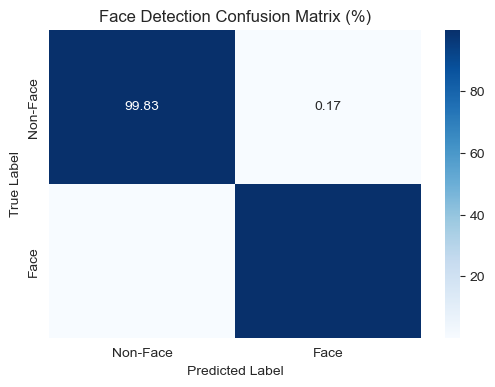


=== Age Group Classification ===
Unique classes in y_true_age_classes: [0 1 2 3 4]
Age group names present: ['18-29', '30-39', '40-49', '50-59', 'more than 60']
Classification Report:
              precision    recall  f1-score   support

       18-29       0.39      0.53      0.45       346
       30-39       0.29      0.26      0.28       333
       40-49       0.37      0.36      0.37       341
       50-59       0.41      0.27      0.33       277
more than 60       0.72      0.76      0.74       247

    accuracy                           0.43      1544
   macro avg       0.44      0.44      0.43      1544
weighted avg       0.42      0.43      0.42      1544



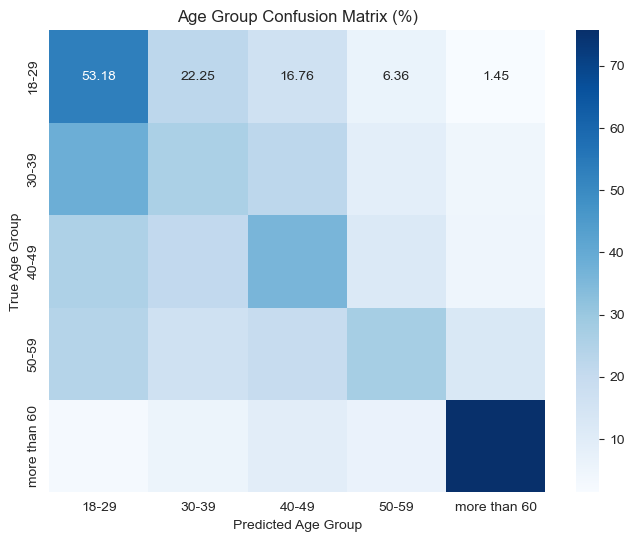


=== Gender Classification ===
Classification Report:
              precision    recall  f1-score   support

        Male       0.79      0.68      0.73       744
      Female       0.74      0.84      0.78       800

    accuracy                           0.76      1544
   macro avg       0.76      0.76      0.76      1544
weighted avg       0.76      0.76      0.76      1544



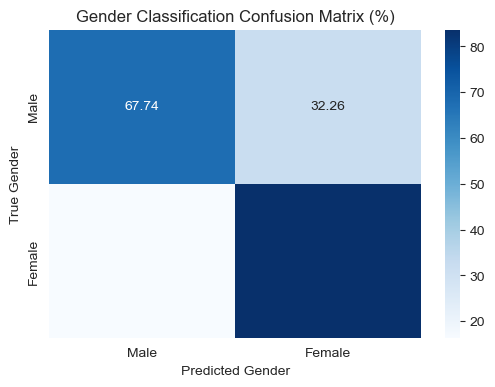

In [11]:
evaluate_model(
    model_path,
    test_dataset,
    age_group_map
)


## EfficientNetB3_MultiTask v2

Model loaded from ../results/Multi_Task/EfficientNetB3_MultiTask_v2/EfficientNetB3_MultiTask_v2.h5
Reverse Age Group Map: {0: '18-29', 1: '30-39', 2: '40-49', 3: '50-59', 4: 'more than 60'}

=== Face Detection ===
Classification Report:
              precision    recall  f1-score   support

    Non-Face       1.00      0.99      0.99      1203
        Face       0.99      1.00      0.99      1544

    accuracy                           0.99      2747
   macro avg       0.99      0.99      0.99      2747
weighted avg       0.99      0.99      0.99      2747



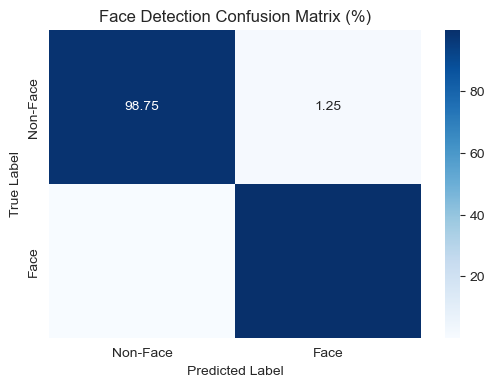


=== Age Group Classification ===
Unique classes in y_true_age_classes: [0 1 2 3 4]
Age group names present: ['18-29', '30-39', '40-49', '50-59', 'more than 60']
Classification Report:
              precision    recall  f1-score   support

       18-29       0.38      0.55      0.45       346
       30-39       0.28      0.30      0.29       333
       40-49       0.32      0.25      0.28       341
       50-59       0.34      0.19      0.24       277
more than 60       0.70      0.72      0.71       247

    accuracy                           0.39      1544
   macro avg       0.40      0.40      0.39      1544
weighted avg       0.39      0.39      0.38      1544



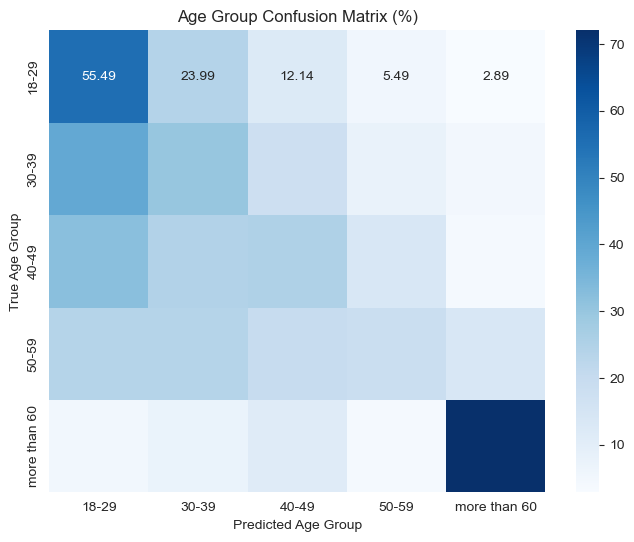


=== Gender Classification ===
Classification Report:
              precision    recall  f1-score   support

        Male       0.79      0.69      0.74       744
      Female       0.74      0.83      0.78       800

    accuracy                           0.76      1544
   macro avg       0.77      0.76      0.76      1544
weighted avg       0.77      0.76      0.76      1544



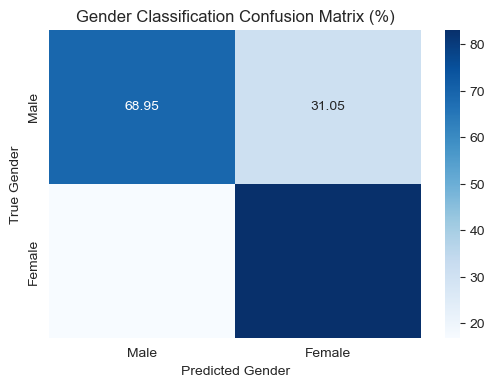

In [13]:
evaluate_model(
    model_path,
    test_dataset,
    age_group_map
)


## MobileNet Multi task

Model loaded from ../results/Multi_Task/MobileNetV2_MultiTask/MobileNetV2_MultiTask.h5
Reverse Age Group Map: {0: '18-29', 1: '30-39', 2: '40-49', 3: '50-59', 4: 'more than 60'}

=== Face Detection ===
Classification Report:
              precision    recall  f1-score   support

    Non-Face       1.00      1.00      1.00      1203
        Face       1.00      1.00      1.00      1544

    accuracy                           1.00      2747
   macro avg       1.00      1.00      1.00      2747
weighted avg       1.00      1.00      1.00      2747



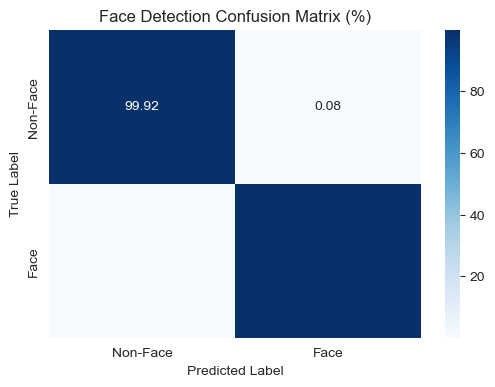


=== Age Group Classification ===
Unique classes in y_true_age_classes: [0 1 2 3 4]
Age group names present: ['18-29', '30-39', '40-49', '50-59', 'more than 60']
Classification Report:
              precision    recall  f1-score   support

       18-29       0.42      0.56      0.48       346
       30-39       0.34      0.31      0.32       333
       40-49       0.37      0.31      0.34       341
       50-59       0.40      0.34      0.37       277
more than 60       0.74      0.78      0.76       247

    accuracy                           0.45      1544
   macro avg       0.45      0.46      0.45      1544
weighted avg       0.44      0.45      0.44      1544



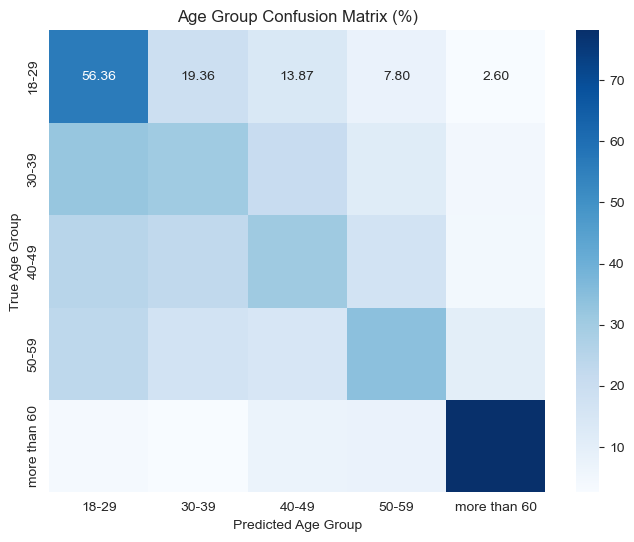


=== Gender Classification ===
Classification Report:
              precision    recall  f1-score   support

        Male       0.77      0.71      0.74       744
      Female       0.75      0.81      0.78       800

    accuracy                           0.76      1544
   macro avg       0.76      0.76      0.76      1544
weighted avg       0.76      0.76      0.76      1544



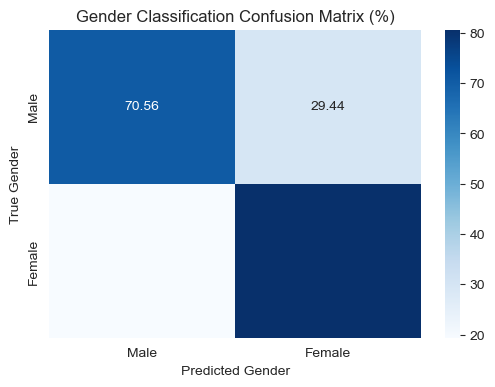

In [8]:
evaluate_model(
    model_path,
    test_dataset,
    age_group_map
)


## MobileNet Multi task v2


Model loaded from ../results/Multi_Task/MobileNetV2_MultiTask_v2/MobileNetV2_MultiTask_v2.h5
Reverse Age Group Map: {0: '18-29', 1: '30-39', 2: '40-49', 3: '50-59', 4: 'more than 60'}

=== Face Detection ===
Classification Report:
              precision    recall  f1-score   support

    Non-Face       1.00      1.00      1.00      1203
        Face       1.00      1.00      1.00      1544

    accuracy                           1.00      2747
   macro avg       1.00      1.00      1.00      2747
weighted avg       1.00      1.00      1.00      2747



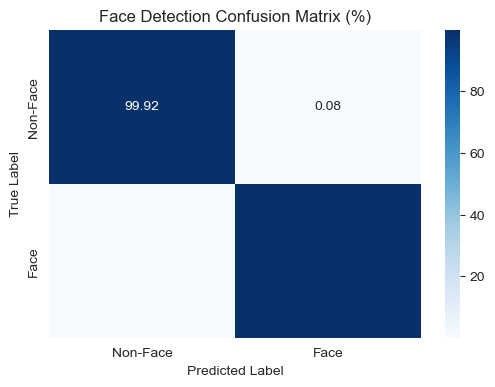


=== Age Group Classification ===
Unique classes in y_true_age_classes: [0 1 2 3 4]
Age group names present: ['18-29', '30-39', '40-49', '50-59', 'more than 60']
Classification Report:
              precision    recall  f1-score   support

       18-29       0.39      0.62      0.48       346
       30-39       0.30      0.20      0.24       333
       40-49       0.32      0.29      0.30       341
       50-59       0.34      0.28      0.31       277
more than 60       0.81      0.74      0.77       247

    accuracy                           0.42      1544
   macro avg       0.43      0.43      0.42      1544
weighted avg       0.41      0.42      0.40      1544



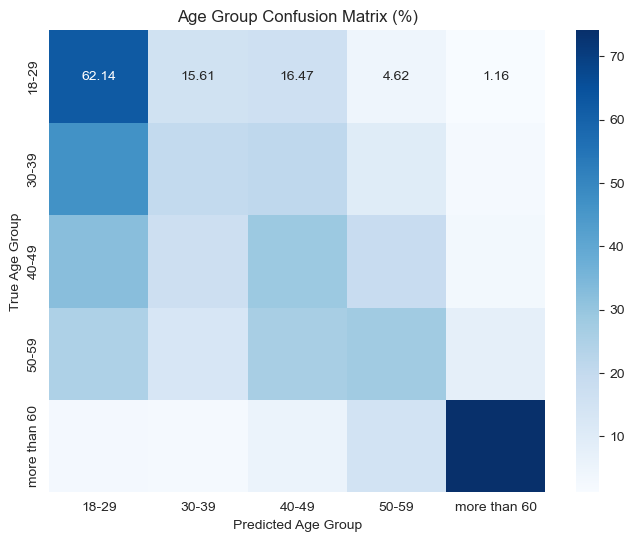


=== Gender Classification ===
Classification Report:
              precision    recall  f1-score   support

        Male       0.78      0.65      0.71       744
      Female       0.72      0.83      0.77       800

    accuracy                           0.74      1544
   macro avg       0.75      0.74      0.74      1544
weighted avg       0.75      0.74      0.74      1544



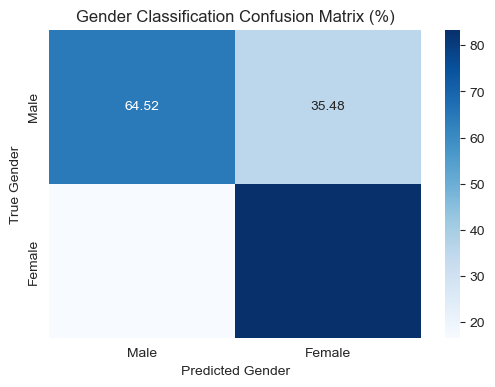

In [10]:
evaluate_model(
    model_path,
    test_dataset,
    age_group_map
)


## ResNet50 MultiTask

Model loaded from ../results/Multi_Task/Resnet_MultiTask/Resnet_MultiTask.h5
Reverse Age Group Map: {0: '18-29', 1: '30-39', 2: '40-49', 3: '50-59', 4: 'more than 60'}

=== Face Detection ===
Classification Report:
              precision    recall  f1-score   support

    Non-Face       1.00      1.00      1.00      1203
        Face       1.00      1.00      1.00      1544

    accuracy                           1.00      2747
   macro avg       1.00      1.00      1.00      2747
weighted avg       1.00      1.00      1.00      2747



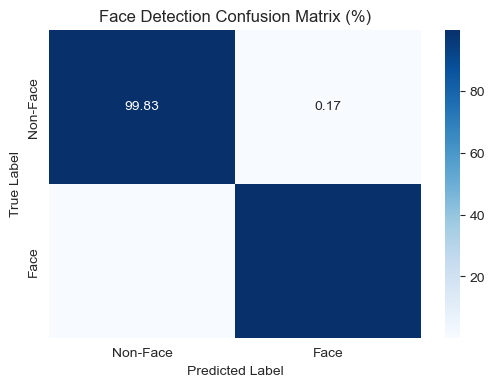


=== Age Group Classification ===
Unique classes in y_true_age_classes: [0 1 2 3 4]
Age group names present: ['18-29', '30-39', '40-49', '50-59', 'more than 60']
Classification Report:
              precision    recall  f1-score   support

       18-29       0.36      0.45      0.40       346
       30-39       0.30      0.51      0.38       333
       40-49       0.36      0.20      0.25       341
       50-59       0.37      0.10      0.16       277
more than 60       0.67      0.77      0.71       247

    accuracy                           0.40      1544
   macro avg       0.41      0.41      0.38      1544
weighted avg       0.40      0.40      0.37      1544



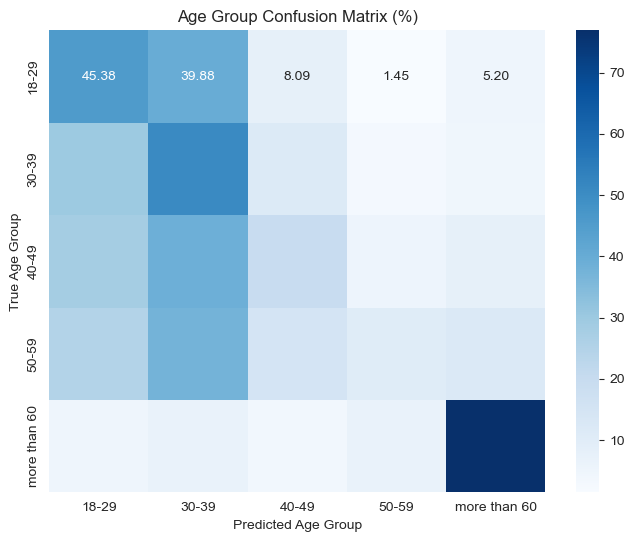


=== Gender Classification ===
Classification Report:
              precision    recall  f1-score   support

        Male       0.77      0.66      0.71       744
      Female       0.72      0.81      0.76       800

    accuracy                           0.74      1544
   macro avg       0.74      0.73      0.73      1544
weighted avg       0.74      0.74      0.74      1544



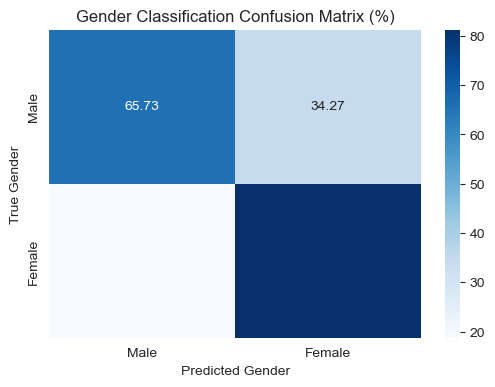

In [8]:
evaluate_model(
    model_path,
    test_dataset,
    age_group_map
)

## ResNet50 MultiTask v2

Model loaded from ../results/Multi_Task/Resnet_MultiTask/Resnet_MultiTask.h5
Reverse Age Group Map: {0: '18-29', 1: '30-39', 2: '40-49', 3: '50-59', 4: 'more than 60'}

=== Face Detection ===
Classification Report:
              precision    recall  f1-score   support

    Non-Face       1.00      1.00      1.00      1203
        Face       1.00      1.00      1.00      1544

    accuracy                           1.00      2747
   macro avg       1.00      1.00      1.00      2747
weighted avg       1.00      1.00      1.00      2747



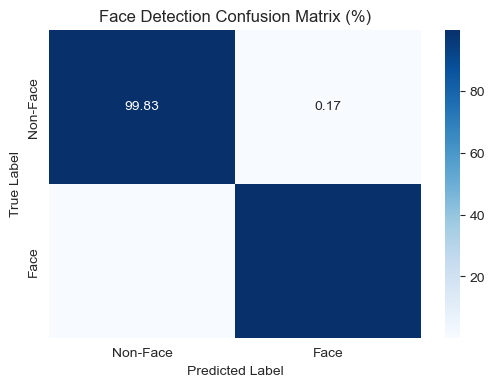


=== Age Group Classification ===
Unique classes in y_true_age_classes: [0 1 2 3 4]
Age group names present: ['18-29', '30-39', '40-49', '50-59', 'more than 60']
Classification Report:
              precision    recall  f1-score   support

       18-29       0.36      0.45      0.40       346
       30-39       0.30      0.51      0.38       333
       40-49       0.36      0.20      0.25       341
       50-59       0.37      0.10      0.16       277
more than 60       0.67      0.77      0.71       247

    accuracy                           0.40      1544
   macro avg       0.41      0.41      0.38      1544
weighted avg       0.40      0.40      0.37      1544



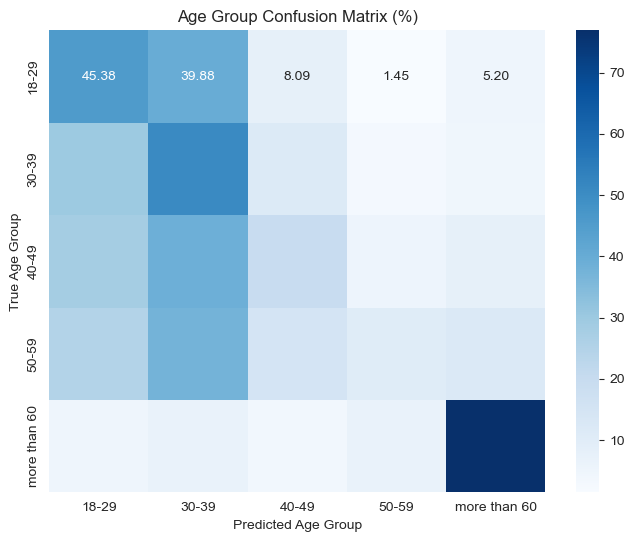


=== Gender Classification ===
Classification Report:
              precision    recall  f1-score   support

        Male       0.77      0.66      0.71       744
      Female       0.72      0.81      0.76       800

    accuracy                           0.74      1544
   macro avg       0.74      0.73      0.73      1544
weighted avg       0.74      0.74      0.74      1544



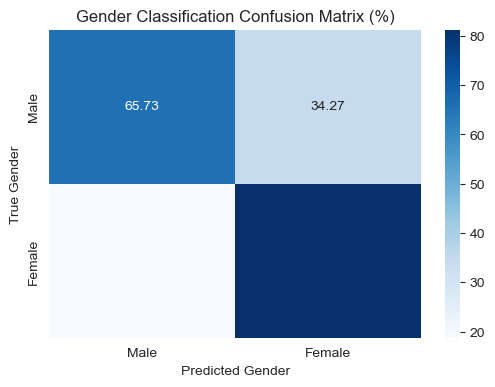

In [9]:
evaluate_model(
    model_path,
    test_dataset,
    age_group_map
)